In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Downloads\SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
for column in df.columns:
    print(column,':',df[column].unique())

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.drop(columns=['Postal Code','Country'],inplace=True)

In [11]:
df['Unit Price']=df['Sales']/df['Quantity']
df['Unit Profit']=df['Profit']/df['Quantity']

In [12]:
df.describe(include='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Unit Price,Unit Profit
count,9977,9977,9977,9977,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000,9977.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,914,1996,3193,6012,1522,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,60.985982,7.808093
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,143.029806,56.122146
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,0.336000,-1319.995600
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,5.472000,0.719400
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,16.272000,2.766400
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,63.940000,8.741200


In [13]:
correlation_matrix=df.drop(['Unit Price','Unit Profit'],axis=1).corr(numeric_only=True)

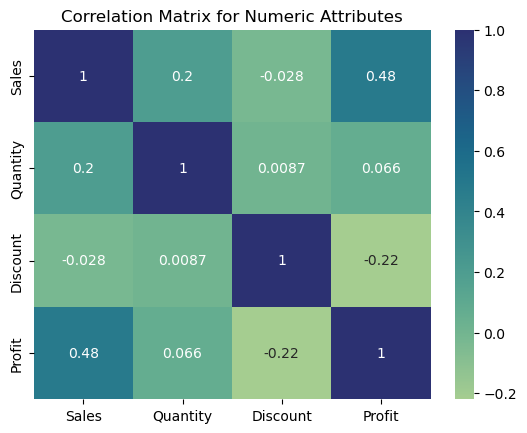

In [14]:
sns.heatmap(correlation_matrix,annot=True,cmap='crest')
plt.title('Correlation Matrix for Numeric Attributes')
plt.show()

In [15]:
df['Discount_NoDiscount']=df.Discount.apply(lambda x: 'No Discount' if (x==0) else 'Discount')

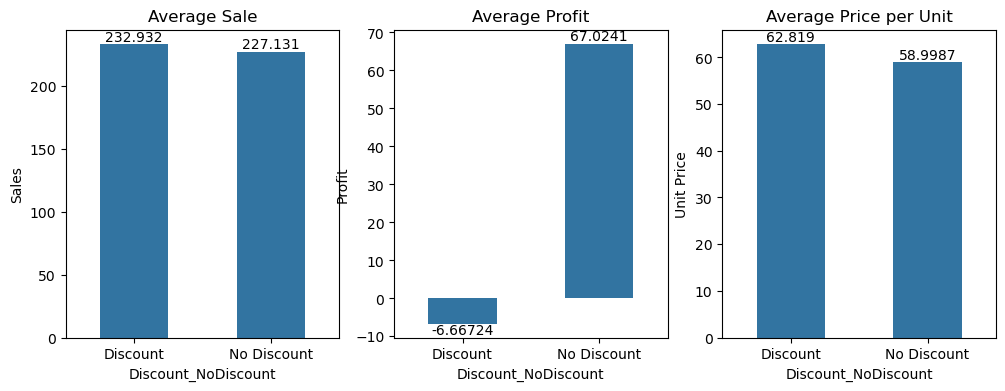

In [16]:
plt.figure(figsize=(12,4))
discount_sales=df.groupby('Discount_NoDiscount')['Sales'].mean()
plt.subplot(1,3,1)
ax=sns.barplot(data=discount_sales,width=0.5)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title('Average Sale')
discount_Profit=df.groupby('Discount_NoDiscount')['Profit'].mean()
plt.subplot(1,3,2)
ax=sns.barplot(data=discount_Profit,width=0.5)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title('Average Profit')
discount_unitprice=df.groupby('Discount_NoDiscount')['Unit Price'].mean()
plt.subplot(1,3,3)
ax=sns.barplot(data=discount_unitprice,width=0.5)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title('Average Price per Unit')
plt.show()


From the above visualizations we notice that:
-People tend to buy more in case of discounts.
-A discounted sale causes loss of about 6$.
-On discounts people tend to buy more expensive products than periods of non-discounts.

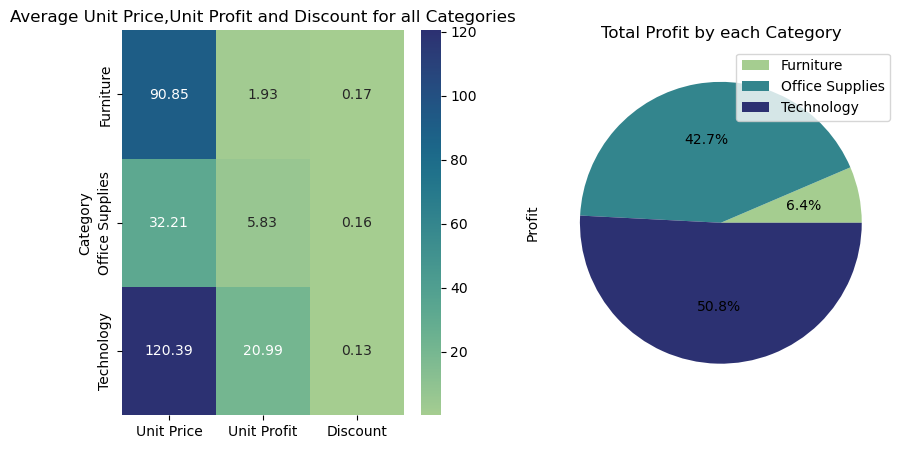

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_categorylevel=df.groupby('Category')[['Unit Price','Unit Profit','Discount']].mean()
sns.heatmap(df_categorylevel,annot=True,fmt='.2f',cbar=True,cmap='crest')
plt.title('Average Unit Price,Unit Profit and Discount for all Categories')
plt.subplot(1,2,2)
df.groupby('Category')['Profit'].sum().plot(kind='pie',colormap='crest',autopct="%.1f%%",labeldistance=None)
plt.legend(loc="upper right")
plt.title('Total Profit by each Category')
plt.show()

We notice from the above visualizations the following:
-Technology category has highest unit price and profit and generate 50% of total profit.
-Office supplies have lowest unit price but are popular and generate about 42.7% of total profit.
-Furniture have lowest unit profit and highest discount and generate only 6.4% of total profit.

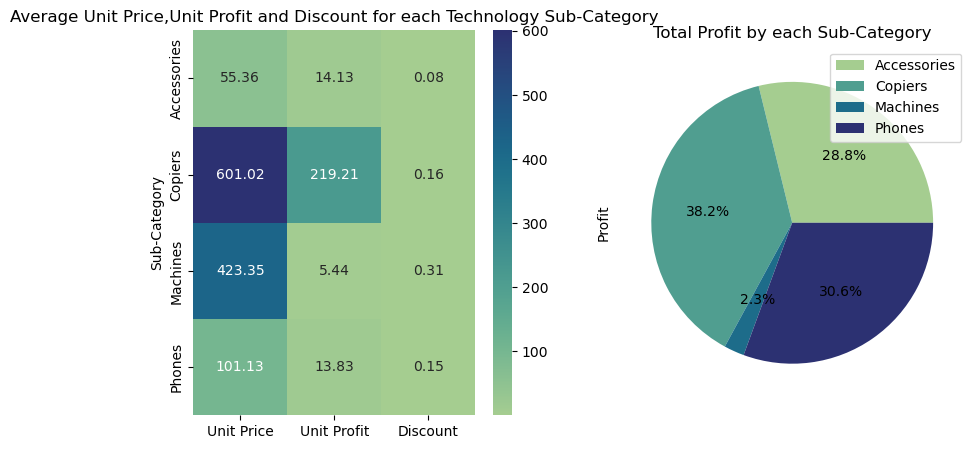

In [18]:
df_technology=df[df.Category=='Technology'].groupby('Sub-Category')[['Unit Price','Unit Profit','Discount']].mean()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(df_technology,annot=True,fmt='.2f',cbar=True,cmap='crest')
plt.title('Average Unit Price,Unit Profit and Discount for each Technology Sub-Category')

plt.subplot(1,2,2)
df[df.Category=='Technology'].groupby('Sub-Category')['Profit'].sum().plot(kind='pie',colormap='crest',autopct="%.1f%%",labeldistance=None)
plt.legend(loc="upper right")
plt.title('Total Profit by each Sub-Category')
plt.show()

We notice from the above visualizations the following:
-Copiers have highest Unit price and Unit Profit and generate profit 38% of total technology profit which is highest of other subcategories.
-Machines have lowest unit profit and generates only 2.3% of total technology profit which indicates that its the least bought item.
-Accessories are most affordable and generate 28% of total technology profit which indicates that they are most bought.
-Phones are also considered profitable and generate 30% of total technology profit.

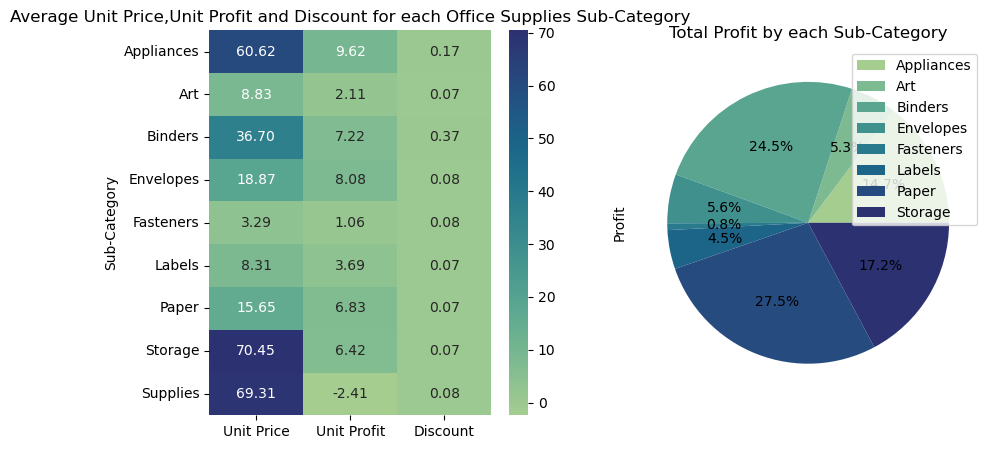

In [26]:
plt.figure(figsize=(10,5))

df_office=df[df.Category=='Office Supplies'].groupby('Sub-Category')[['Unit Price','Unit Profit','Discount']].mean()
plt.subplot(1,2,1)
sns.heatmap(df_office,annot=True,fmt='.2f',cbar=True,cmap='crest')
plt.title('Average Unit Price,Unit Profit and Discount for each Office Supplies Sub-Category')
plt.subplot(1,2,2)
df[(df.Category=='Office Supplies') & (df['Sub-Category']!='Supplies')].groupby('Sub-Category')['Profit'].sum().plot(kind='pie',colormap='crest',autopct="%.1f%%",labeldistance=None)
plt.legend(loc="upper right")
plt.title('Total Profit by each Sub-Category')
plt.show()

From the above visualization we notice the following:
-Appliances having highest unit profit followed by Envelopes.
-Supplies causes loss of average 2.4$ per unit.
-Fasteners having lowest unit profit and contribute least to total profit with only 0.8%.
-Paper contributing most to total profit.

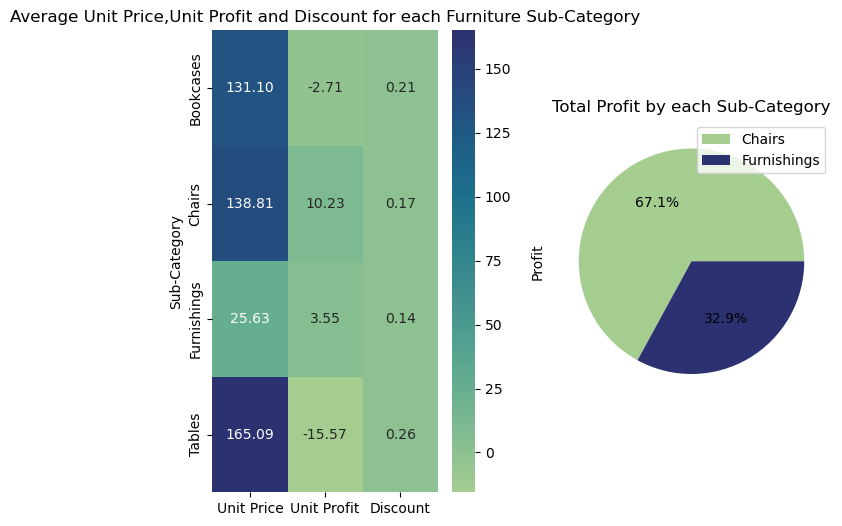

In [27]:
df_furniture=df[df.Category=='Furniture'].groupby('Sub-Category')[['Unit Price','Unit Profit','Discount']].mean()
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.heatmap(df_furniture,annot=True,fmt='.2f',cbar=True,cmap='crest')
plt.title('Average Unit Price,Unit Profit and Discount for each Furniture Sub-Category')
plt.subplot(1,2,2)
df[(df.Category=='Furniture') & (df['Sub-Category']!='Tables') & (df['Sub-Category']!='Bookcases')].groupby('Sub-Category')['Profit'].sum().plot(kind='pie',colormap='crest',autopct="%.1f%%",labeldistance=None)
plt.legend(loc="upper right")
plt.title('Total Profit by each Sub-Category')
plt.show()

From the above visualization we notice the following:
-Chairs having the highest unit profit contributing to total category profits by 67%.
-Tables and Bookcases both causing loss of about 15$ and 2.7$.

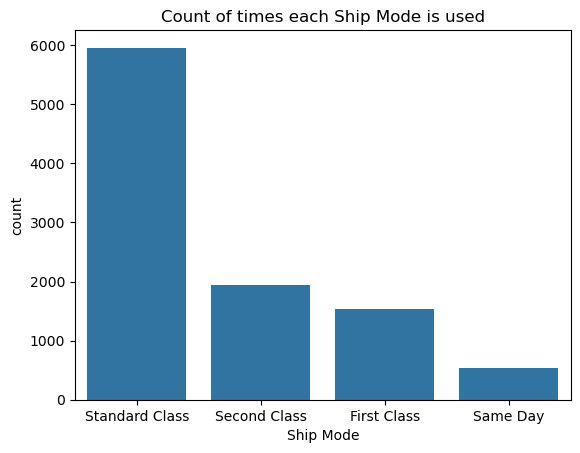

In [51]:
df_shipmode=df['Ship Mode'].value_counts()
sns.barplot(data=df_shipmode)
plt.title('Count of times each Ship Mode is used')
plt.show()

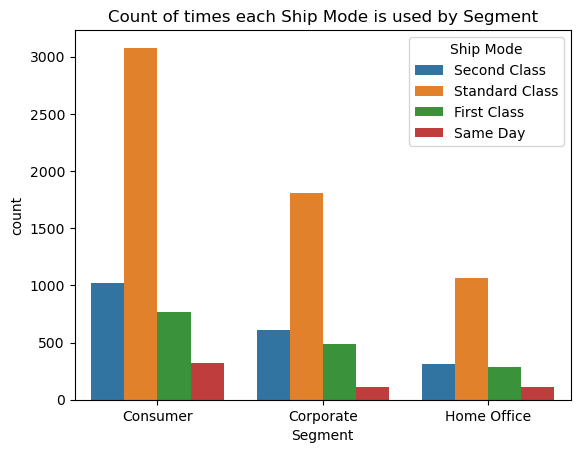

In [57]:
sns.countplot(data=df,x='Segment',hue='Ship Mode')
plt.title('Count of times each Ship Mode is used by Segment')
plt.show()

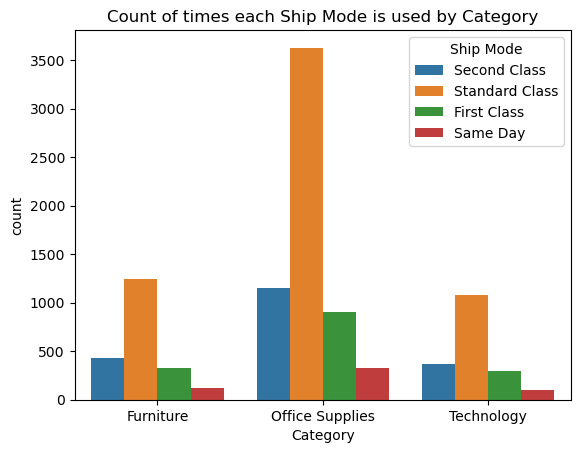

In [56]:
sns.countplot(data=df,x='Category',hue='Ship Mode')
plt.title('Count of times each Ship Mode is used by Category')
plt.show()

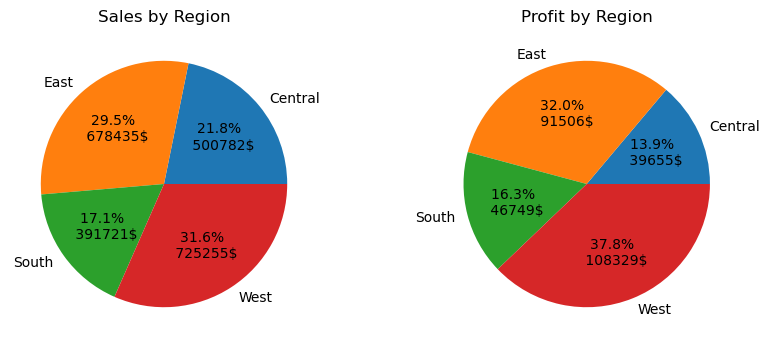

In [78]:
def func(pct,total):
    sale=int(pct/100*np.sum(total))
    return '{:.1f}% \n {:d}$'.format(pct,sale)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
region_sales=df.groupby('Region')['Sales'].sum()
plt.pie(region_sales,autopct=lambda pct : func(pct,region_sales),labels=region_sales.index)
plt.title('Sales by Region')
plt.subplot(1,2,2)
region_profit=df.groupby('Region')['Profit'].sum()
plt.pie(region_profit,autopct=lambda pct : func(pct,region_profit),labels=region_profit.index)
plt.title('Profit by Region')
plt.show()

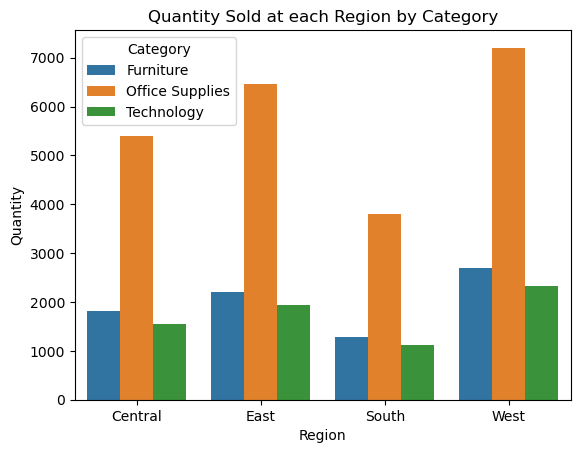

In [89]:
df_region_category=df.groupby(['Region','Category'])[['Quantity']].sum()
sns.barplot(data=df_region_category,x='Region',y='Quantity',hue='Category')
plt.title('Quantity Sold at each Region by Category')
plt.show()

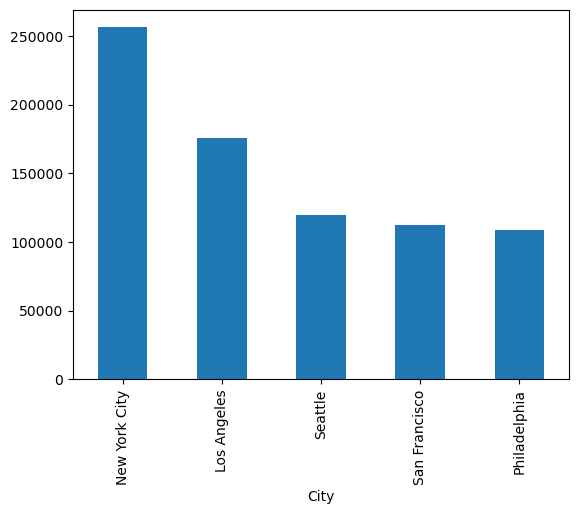

In [98]:
top_5_cities=df.groupby('City')['Sales'].sum().sort_values(ascending=False)[0:5].plot.bar()
plt.title('Top 5 Cities by Sales')
plt.show()

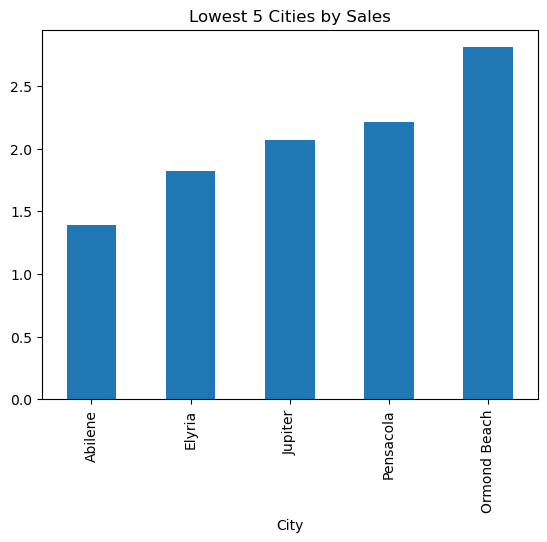

In [99]:
lowest_5_cities=df.groupby('City')['Sales'].sum().sort_values()[0:5].plot.bar()
plt.title('Lowest 5 Cities by Sales')
plt.show()